# Thanks for Visting 👉  [Jellyfish Image Dataset](https://www.kaggle.com/datasets/anshtanwar/jellyfish-types) 👈
![](https://images4.alphacoders.com/872/thumb-1920-872484.jpg)
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    In this notebook I have used transfer learning for Jellyfish species classification. Feel free to fork or edit the notebook.If you have any feedback or improvement on this approach do share in comments. Thank you.
</div>

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Importing The Modules</div>

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetV2B0, Xception, VGG19, ConvNeXtTiny
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Data Loading and Preprocessing</div>

In [6]:
# Define the path to the dataset folders
Moon_jellyfish_folder = "/kaggle/input/jellyfish-types/Moon_jellyfish"
barrel_jellyfish_folder = "/kaggle/input/jellyfish-types/barrel_jellyfish"
blue_jellyfish_folder = "/kaggle/input/jellyfish-types/blue_jellyfish"
compass_jellyfish_folder = "/kaggle/input/jellyfish-types/compass_jellyfish"
lions_mane_jellyfish_folder = "/kaggle/input/jellyfish-types/lions_mane_jellyfish"
mauve_stinger_jellyfish = "/kaggle/input/jellyfish-types/mauve_stinger_jellyfish"



# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224, 224))  # Resize to a fixed size for the model
            images.append(img)
    return images

Moon_jellyfish_folder = "/kaggle/input/jellyfish-types/Moon_jellyfish"
barrel_jellyfish_folder = "/kaggle/input/jellyfish-types/barrel_jellyfish"
blue_jellyfish_folder = "/kaggle/input/jellyfish-types/blue_jellyfish"
compass_jellyfish_folder = "/kaggle/input/jellyfish-types/compass_jellyfish"
lions_mane_jellyfish_folder = "/kaggle/input/jellyfish-types/lions_mane_jellyfish"
mauve_stinger_jellyfish_folder = "/kaggle/input/jellyfish-types/mauve_stinger_jellyfish"

# Load images and labels for each emotion
Moon_images = load_images_from_folder(Moon_jellyfish_folder)
barrel_images = load_images_from_folder(barrel_jellyfish_folder)
blue_images = load_images_from_folder(blue_jellyfish_folder)
compass_images = load_images_from_folder(compass_jellyfish_folder)
lions_mane_images = load_images_from_folder(lions_mane_jellyfish_folder)
mauve_stinger_images = load_images_from_folder(mauve_stinger_jellyfish_folder)


# Create labels for each emotion category
Moon_labels = [0] * len(Moon_images)
barrel_labels = [1] * len(barrel_images)
blue_labels = [2] * len(blue_images)
compass_labels = [3] * len(compass_images)
lions_mane_labels = [4] * len(lions_mane_images)
mauve_stinger_labels = [5] * len(mauve_stinger_images)

all_labels = Moon_labels+barrel_labels+blue_labels+compass_labels+lions_mane_labels+mauve_stinger_labels 


In [7]:
class_labels={
    0:'moon',
    1:'barrel',
    2:'blue',
    3:'compass',
    4:'lions mane',
    5:'mauve stinger'
}

In [8]:
print('Moon_jellyfish_images: ',len(Moon_images))
print('barrel_jellyfish_images: ',len(barrel_images))
print('blue_jellyfish_images: ',len(blue_images))
print('compass_jellyfish_images: ',len(compass_images))
print('lions_mane_jellyfish_images: ',len(lions_mane_images))
print('mauve_stinger_jellyfish_images: ',len(mauve_stinger_images))

Moon_jellyfish_images:  150
barrel_jellyfish_images:  150
blue_jellyfish_images:  150
compass_jellyfish_images:  150
lions_mane_jellyfish_images:  150
mauve_stinger_jellyfish_images:  150


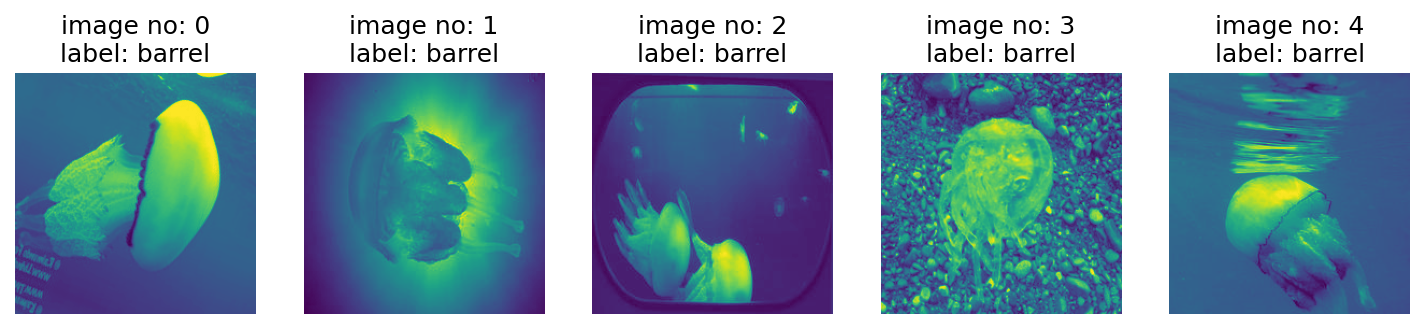

In [9]:
#print(Moon_images[0])
fig, axs = plt.subplots(1,5, figsize = (12,12) ,dpi = 150)

for i in range(5):
    img = barrel_images[i]
    label = barrel_labels[i]
        
    axs[i].imshow(img) 
    axs[i].axis('off')
    axs[i].set_title('image no: ' + str(i) + '\n'+ 'label: '+ class_labels[label])
    
plt.show()

#plt.imshow(Moon_images[0])

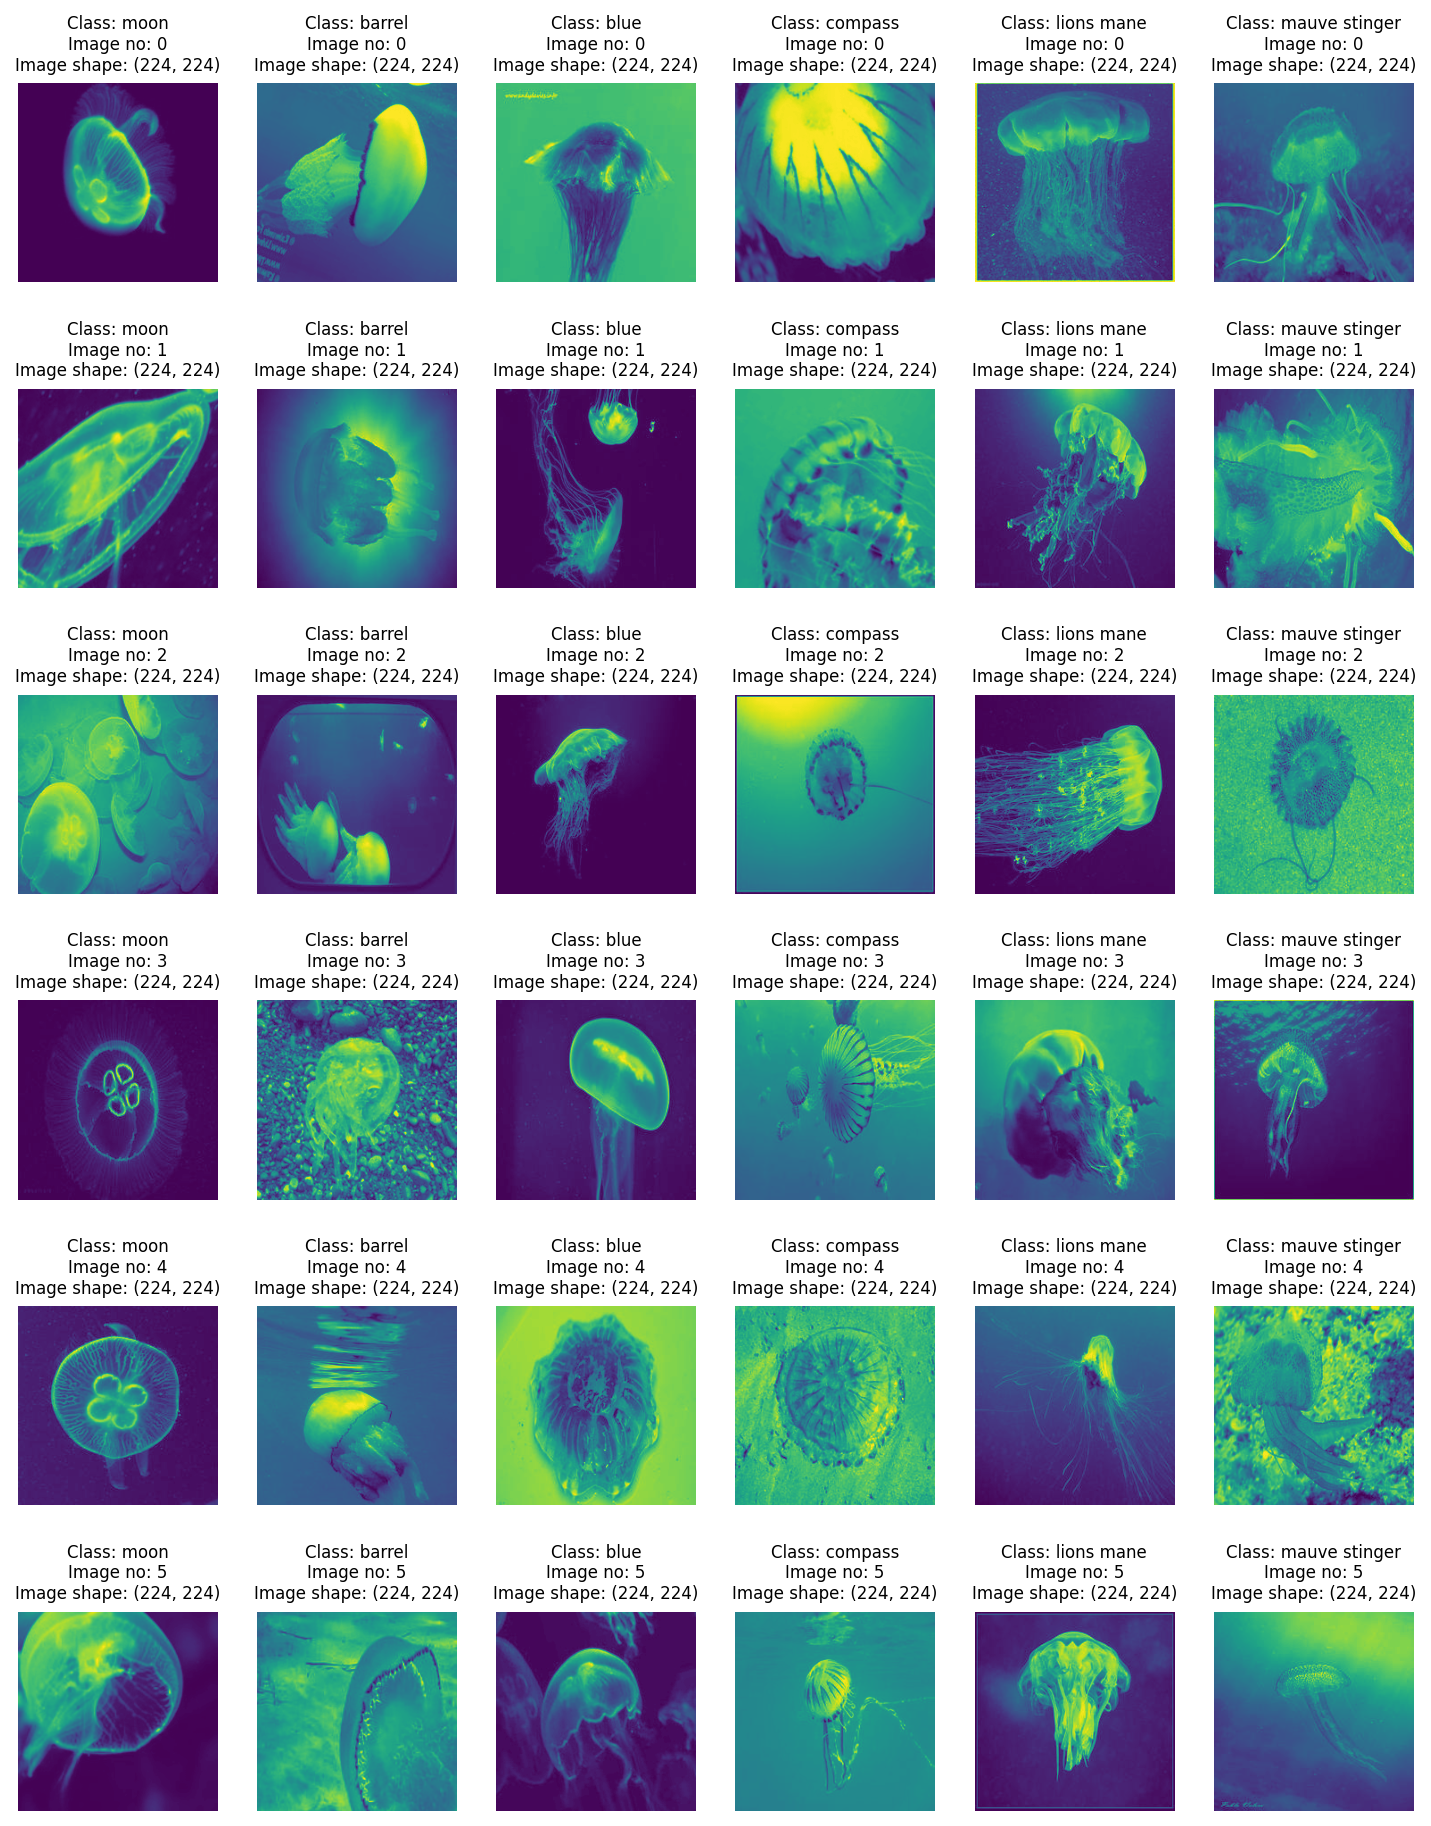

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

class_images = {
    0: Moon_images,
    1: barrel_images,
    2: blue_images,
    3: compass_images,
    4: lions_mane_images,
    5: mauve_stinger_images
}


# Set up subplots with increased vertical spacing
num_rows = 6
num_cols = len(class_images)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 15), dpi=150, gridspec_kw={"hspace": 0.5})

# Iterate through each class
for i, (label, images) in enumerate(class_images.items()):
    # Iterate through 6 images for each class
    for j in range(num_rows):
        # If there are not enough images for the current class, leave the subplot blank
        if j < len(images):
            img = images[j]
            axs[j, i].imshow(img)
            axs[j, i].axis('off')
            axs[j, i].set_title('Class: ' + class_labels[label] + '\nImage no: ' + str(j) + '\nImage shape: ' + str(img.shape), fontsize=8)
        else:
            axs[j, i].axis('off')

plt.show()


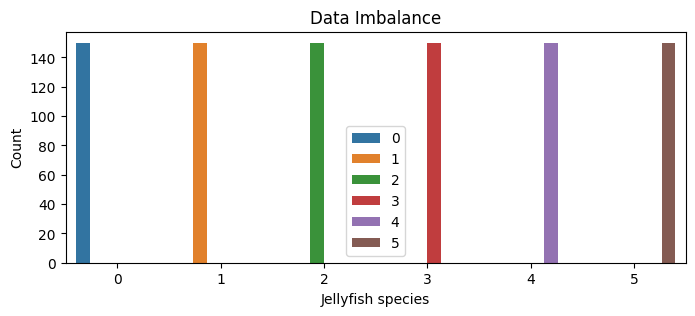

In [11]:
# Data Imbalance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.countplot(x=all_labels, hue=all_labels)
plt.title('Data Imbalance')
plt.xlabel('Jellyfish species')
plt.ylabel('Count')
plt.show()

In [12]:
# Concatenate images and labels
X = np.array(Moon_images + barrel_images + blue_images + compass_images + lions_mane_images + mauve_stinger_images)
y = np.array(Moon_labels + barrel_labels + blue_labels + compass_labels + lions_mane_labels + mauve_stinger_labels)

print(X.shape)

# Normalize pixel values to range [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = np_utils.to_categorical(y, 6)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(900, 224, 224)


In [13]:
print(X_train.shape)

(720, 224, 224)


In [14]:
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)
input_shape_xception = (224, 224, 3)
input_shape_vgg19 = (224, 224, 3)
input_shape_convnext = (224, 224, 3)

def resize_images(images, input_shape):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, (input_shape[0], input_shape[1]))
        #img_resized = np.expand_dims(img_resized, axis=-1)
        #img_resized = np.repeat(img_resized, 3, axis=-1)  # Add three channels to convert grayscale to RGB
        # this line below is identital to the two one above
        img_resized = np.repeat(img_resized[:,:,np.newaxis], 3, axis=-1) # here the aaray is just expanded into a an 3d array with the second and thrid dimenson are onyl a copy of the first one + the original image array is expaned from a 2d array into a 3d one, by adding an empty dimension with the np.newaxis
        resized_images.append(img_resized)
    return np.array(resized_images)



(720, 224, 224, 3)


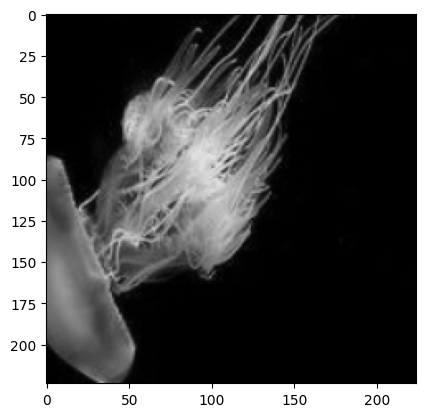

In [15]:
X_train_resized_resnet = resize_images(X_train, input_shape_resnet)
plt.imshow(X_train_resized_resnet[0])
print(X_train_resized_resnet.shape)

In [16]:
X_train_resized_densenet = resize_images(X_train, input_shape_densenet)
X_train_resized_xception = resize_images(X_train, input_shape_xception)
X_train_resized_vgg19 = resize_images(X_train, input_shape_vgg19)
X_train_resized_convnext = resize_images(X_train, input_shape_convnext)

In [17]:
X_train_resized_efficientnet = resize_images(X_train, input_shape_efficientnet)

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Training and Evaluation</div>

<div style="background-color:#ffb7cc; padding: 20px;">For ResNet, DenseNet, and EfficientNet, we first load their pre-trained versions from the Keras library with weights trained on ImageNet. We remove their top classification layer, which was originally designed for ImageNet's 1000 classes, and add our custom classification head tailored for our task with three output classes (happy, sad, and angry). This new classification head is appended to the base models' output using global average pooling to extract meaningful features from the images.After adding the custom classification head, we compile each model using categorical cross-entropy as the loss function and the Adam optimizer</div>

In [18]:
efficientsnet_v2_base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=input_shape_efficientnet)
efficientsnet_v2_base_model.trainable = False

efficientnet_global_avg_pooling = GlobalAveragePooling2D()(efficientsnet_v2_base_model.output)
efficientnet_output = Dense(6, activation='softmax')(efficientnet_global_avg_pooling)
efficientnet_model = Model(inputs=efficientsnet_v2_base_model.input, outputs=efficientnet_output)

efficientnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


24274472/24274472 [==============================] - 0s 0us/step


In [19]:
Xception_base = Xception(weights='imagenet', include_top=False, input_shape=input_shape_xception)
Xception_base.trainable = False

xception_global_avg_pooling = GlobalAveragePooling2D()(Xception_base.output)
xception_output = Dense(6, activation='softmax')(xception_global_avg_pooling)
xception_model = Model(inputs=Xception_base.input, outputs=xception_output)

xception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

83683744/83683744 [==============================] - 0s 0us/step


In [20]:
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape_vgg19)
vgg19_base.trainable = False

vgg19_global_avg_pooling = GlobalAveragePooling2D()(vgg19_base.output)
vgg19_output = Dense(6, activation='softmax')(vgg19_global_avg_pooling)
vgg19_model = Model(inputs=vgg19_base.input, outputs=vgg19_output)

vgg19_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

80134624/80134624 [==============================] - 0s 0us/step


In [21]:
convnext_base = ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=input_shape_convnext)
convnext_base.trainable = False

convnext_global_avg_pooling = GlobalAveragePooling2D()(convnext_base.output)
convnext_output = Dense(6, activation='softmax')(convnext_global_avg_pooling)
convnext_model = Model(inputs=convnext_base.input, outputs=convnext_output)

convnext_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

111650432/111650432 [==============================] - 1s 0us/step


In [22]:
# Load pre-trained ResNet50 model and remove the top classification layer
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape_resnet)
resnet_base_model.trainable = False

# Add custom classification head to the ResNet model
resnet_global_avg_pooling = GlobalAveragePooling2D()(resnet_base_model.output)
resnet_output = Dense(6, activation='softmax')(resnet_global_avg_pooling)
resnet_model = Model(inputs=resnet_base_model.input, outputs=resnet_output)

# Compile the ResNet model
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


densenet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape_densenet)
densenet_base_model.trainable = False


densenet_global_avg_pooling = GlobalAveragePooling2D()(densenet_base_model.output)
densenet_output = Dense(6, activation='softmax')(densenet_global_avg_pooling)
densenet_model = Model(inputs=densenet_base_model.input, outputs=densenet_output)


densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-7)

# Train the models
'''
train the models on resized training data and validation split,
monitoring the validation loss and using the
early stopping and learning rate scheduling callbacks to stop when necessary.
'''

resnet_history = resnet_model.fit(X_train_resized_resnet, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])
densenet_history = densenet_model.fit(X_train_resized_densenet, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])
efficientnet_history = efficientnet_model.fit(X_train_resized_efficientnet, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])
xception_history = xception_model.fit(X_train_resized_xception, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])
vgg19_history = vgg19_model.fit(X_train_resized_vgg19, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])
convnext_history = convnext_model.fit(X_train_resized_convnext, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/200
18/18 [==============================] - 16s 248ms/step - loss: 1.8449 - accuracy: 0.1684 - val_loss: 1.8269 - val_accuracy: 0.1806 - lr: 0.0010
Epoch 2/200
18/18 [==============================] - 2s 120ms/step - loss: 1.8259 - accuracy: 0.1667 - val_loss: 1.8006 - val_accuracy: 0.1944 - lr: 0.0010
Epoch 3/200
18/18 [==============================] - 2s 120ms/step - loss: 1.8000 - accuracy: 0.1823 - val_loss: 1.7920 - val_accuracy: 0.1389 - lr: 0.0010
Epoch 4/200
18/18 [==============================] - 2s 119ms/step - loss: 1.7803 - accuracy: 0.1736 - val_loss: 1.7766 - val_accuracy: 0.1806 - lr: 0.0010
Epoch 5/200
18/18 [==============================] - 2s 120ms/step - loss: 1.7827 - accuracy: 0.1649 - val_loss: 1.7599 - val_accuracy: 0.1944 - lr: 0.0010
Epoch 6/200
18/18 [==============================] - 2s 119ms/step - loss: 1.7807 - accuracy: 0.1823 - val_loss: 1.7582 - val_accuracy: 0.2569 - lr: 0.001

2023-11-10 13:59:29.880304: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


18/18 [==============================] - 12s 256ms/step - loss: 1.8194 - accuracy: 0.1372 - val_loss: 1.8294 - val_accuracy: 0.1597 - lr: 0.0010
Epoch 2/200
18/18 [==============================] - 1s 68ms/step - loss: 1.8175 - accuracy: 0.1510 - val_loss: 1.8015 - val_accuracy: 0.1528 - lr: 0.0010
Epoch 3/200
18/18 [==============================] - 1s 62ms/step - loss: 1.8208 - accuracy: 0.1615 - val_loss: 1.8267 - val_accuracy: 0.1528 - lr: 0.0010
Epoch 4/200
18/18 [==============================] - 1s 61ms/step - loss: 1.8282 - accuracy: 0.1389 - val_loss: 1.8410 - val_accuracy: 0.1597 - lr: 0.0010
Epoch 5/200
18/18 [==============================] - 1s 62ms/step - loss: 1.8065 - accuracy: 0.1667 - val_loss: 1.8030 - val_accuracy: 0.1389 - lr: 0.0010
Epoch 6/200
18/18 [==============================] - 1s 62ms/step - loss: 1.8197 - accuracy: 0.1684 - val_loss: 1.8091 - val_accuracy: 0.1528 - lr: 0.0010
Epoch 7/200
18/18 [==============================] - 1s 68ms/step - loss: 1.8165

In [23]:
# Resize test images to the input shape required by each model
X_test_resized_densenet = resize_images(X_test, input_shape_densenet)
X_test_resized_resnet = resize_images(X_test, input_shape_resnet)
X_test_resized_efficientnet = resize_images(X_test, input_shape_efficientnet)
X_test_resized_xception = resize_images(X_test, input_shape_xception)
X_test_resized_vgg19 = resize_images(X_test, input_shape_vgg19)
X_test_resized_convnext = resize_images(X_test, input_shape_convnext)

# Evaluate the models on test data
densenet_loss, densenet_accuracy = densenet_model.evaluate(X_test_resized_densenet, y_test)
resnet_loss, resnet_accuracy = resnet_model.evaluate(X_test_resized_resnet, y_test)
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_test_resized_efficientnet, y_test)
xception_loss, xception_accuracy = xception_model.evaluate(X_test_resized_xception, y_test)
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(X_test_resized_vgg19, y_test)
convnext_loss, convnext_accuracy = convnext_model.evaluate(X_test_resized_convnext, y_test)


print("\n")
print("DenseNet Test accuracy:", densenet_accuracy)
print("ResNet Test accuracy:", resnet_accuracy)
print('Efficientnet Test accuracy:', efficientnet_accuracy)
print("Xception Test accuracy:", xception_accuracy)
print("VGG19 Test accuracy:", vgg19_accuracy)
print("ConvNeXt Test accuracy:", convnext_accuracy)

6/6 [==============================] - 4s 774ms/step - loss: 1.4599 - accuracy: 0.4667


DenseNet Test accuracy: 0.9333333373069763
ResNet Test accuracy: 0.33888888359069824
Efficientnet Test accuracy: 0.18333333730697632
Xception Test accuracy: 0.8722222447395325
VGG19 Test accuracy: 0.7111111283302307
ConvNeXt Test accuracy: 0.46666666865348816


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Learning and Accuracy Curve</div>

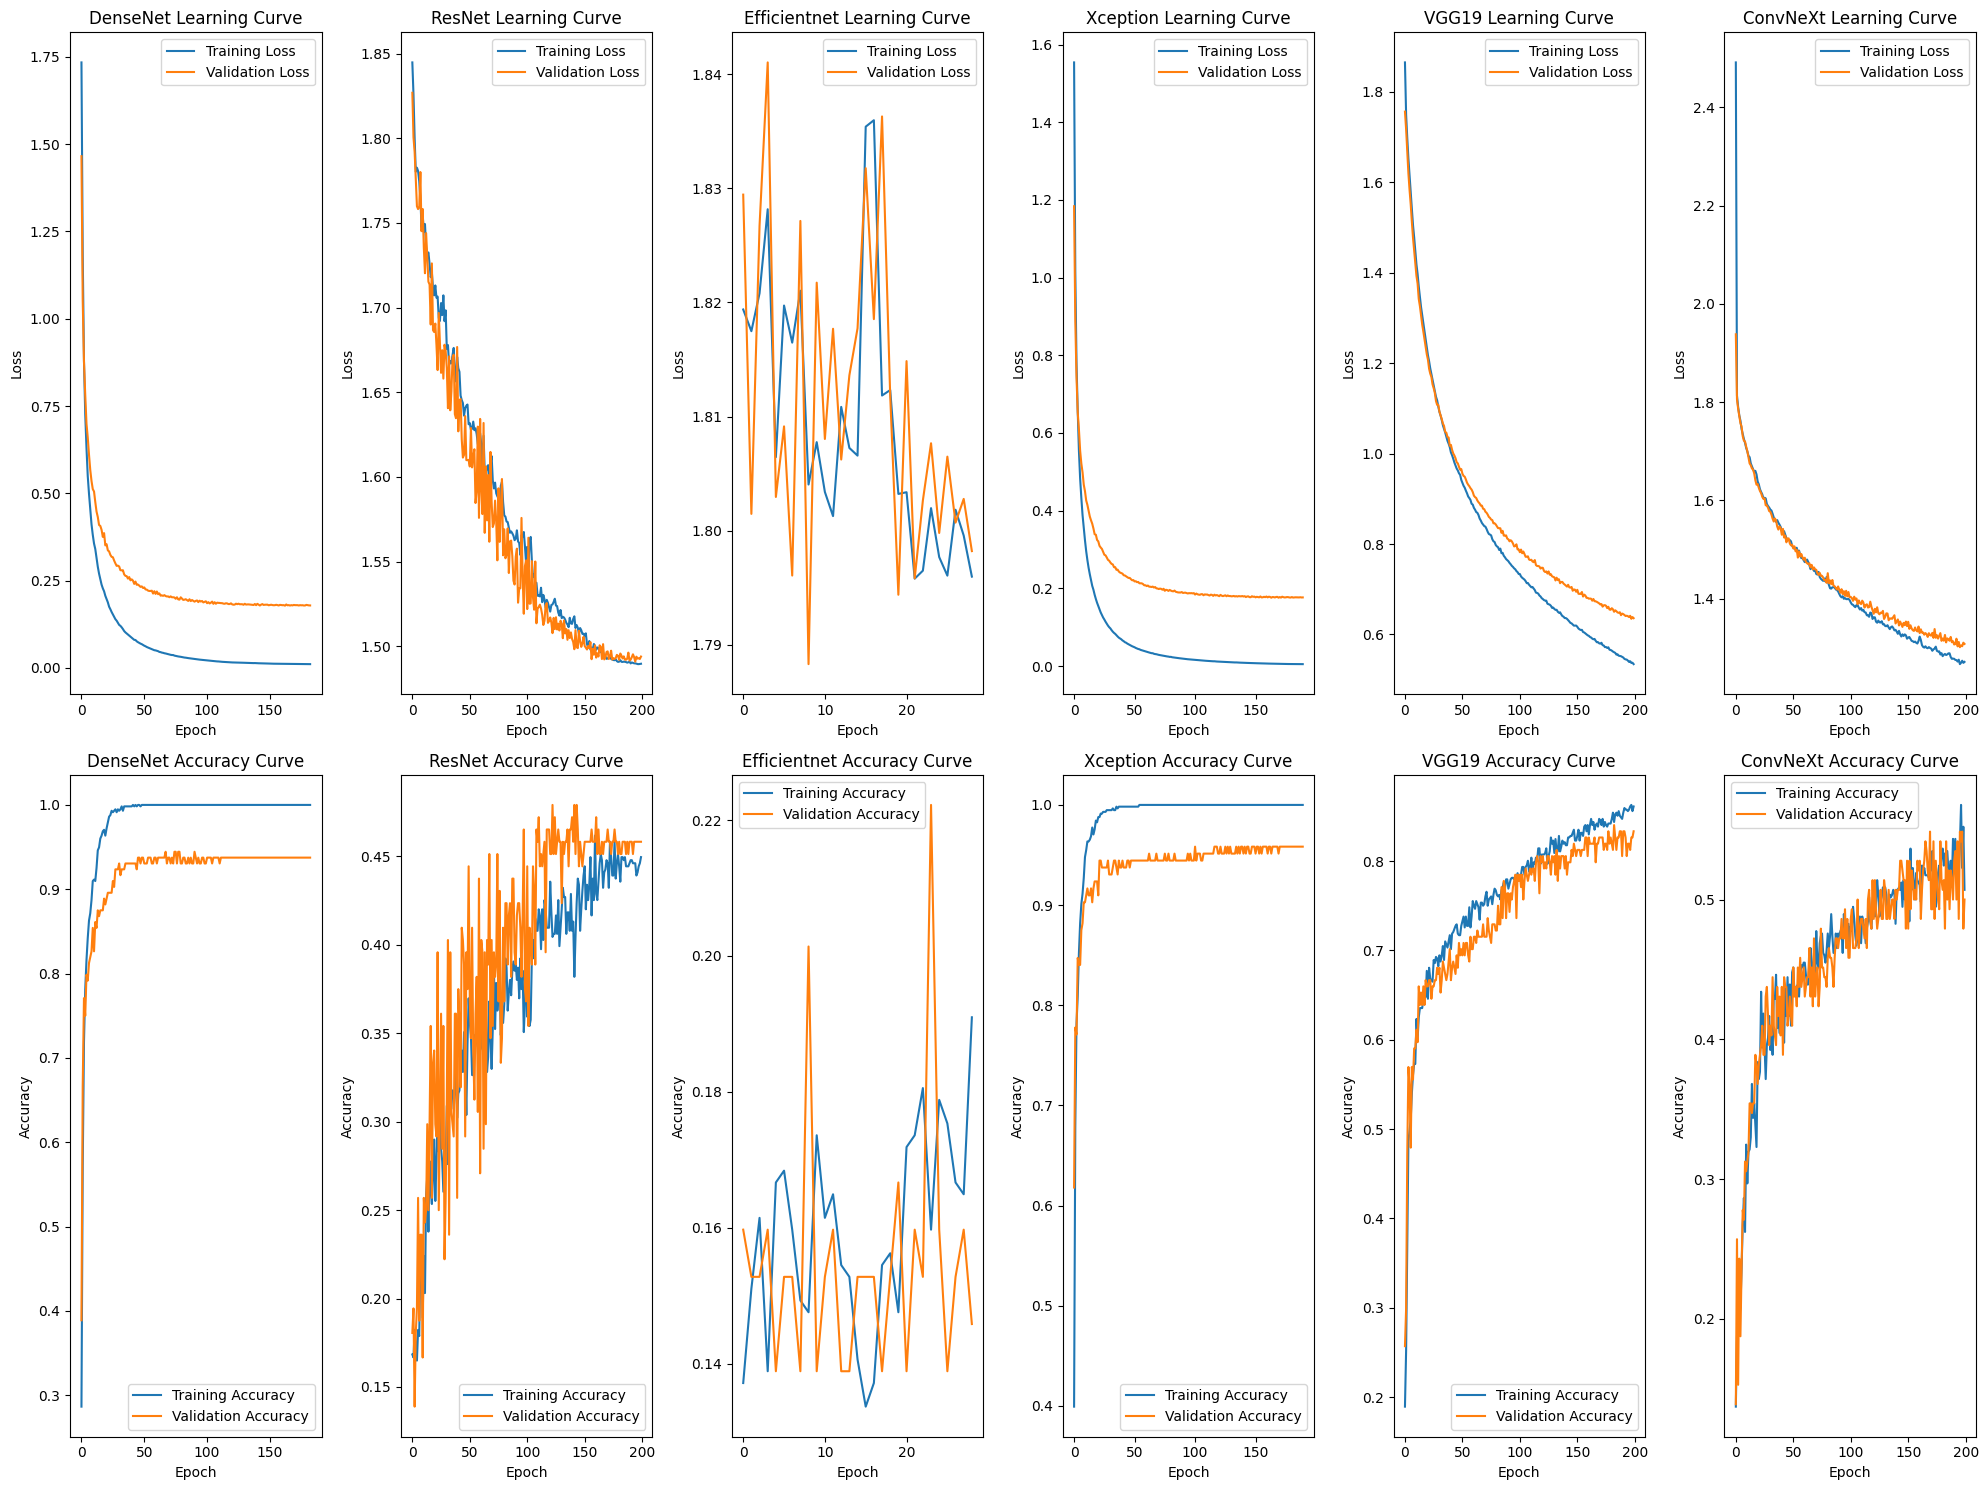

In [24]:
import matplotlib.pyplot as plt


def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()


def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()


fig, axs = plt.subplots(2, 6, figsize=(20, 15))

# Plotting for DenseNet
plot_learning_curves(densenet_history, 'DenseNet', axs[0, 0])
plot_accuracy_curves(densenet_history, 'DenseNet', axs[1, 0])

# Plotting for ResNet
plot_learning_curves(resnet_history, 'ResNet', axs[0, 1])
plot_accuracy_curves(resnet_history, 'ResNet', axs[1, 1])  # Changed column index to 2

# Plotting for EfficientNet
plot_learning_curves(efficientnet_history, 'Efficientnet', axs[0, 2])
plot_accuracy_curves(efficientnet_history, 'Efficientnet', axs[1, 2])


plot_learning_curves(xception_history, 'Xception', axs[0, 3])
plot_accuracy_curves(xception_history, 'Xception', axs[1, 3])


plot_learning_curves(vgg19_history, 'VGG19', axs[0, 4])
plot_accuracy_curves(vgg19_history, 'VGG19', axs[1, 4])


plot_learning_curves(convnext_history, 'ConvNeXt', axs[0, 5])
plot_accuracy_curves(convnext_history, 'ConvNeXt', axs[1, 5])

plt.tight_layout()
plt.show()
